In [3]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import tarfile

%load_ext autoreload
%autoreload 2
    
#runALU.ITER9000.PARALLEL1.ROUND1

NROUND=3
NPARALLEL=88


#NROUND=1
#NPARALLEL=1
df_dict = {
    'round': [], 
    'parallel': [], 
    'iter': [], 
    'kepler_container_bpf_block_irq_total': [], 
    'kepler_container_bpf_cpu_time_ms_total': [], 
    'kepler_container_bpf_net_rx_irq_total': [], 
    'kepler_container_bpf_net_tx_irq_total': [], 
    'kepler_container_bpf_page_cache_hit_total': [], 
    'kepler_container_cache_miss_total': [], 
    'dynamic_kepler_container_core_joules_total': [], 
    'idle_kepler_container_core_joules_total': [], 
    'kepler_container_cpu_cycles_total': [], 
    'kepler_container_cpu_instructions_total': [], 
    'dynamic_kepler_container_dram_joules_total': [], 
    'idle_kepler_container_dram_joules_total': [], 
    'dynamic_kepler_container_gpu_joules_total': [], 
    'idle_kepler_container_gpu_joules_total': [], 
    'dynamic_kepler_container_joules_total': [], 
    'idle_kepler_container_joules_total': [], 
    'dynamic_kepler_container_other_joules_total': [], 
    'idle_kepler_container_other_joules_total': [], 
    'dynamic_kepler_container_package_joules_total': [], 
    'idle_kepler_container_package_joules_total': [], 
    'dynamic_kepler_container_platform_joules_total': [], 
    'idle_kepler_container_platform_joules_total': [], 
    'kepler_container_task_clock_ms_total': [], 
    'dynamic_kepler_container_uncore_joules_total': [], 
    'idle_kepler_container_uncore_joules_total': []

}

metrics_list = [
    "kepler_container_joules_total",
    "kepler_node_dram_joules_total",
    "kepler_node_package_joules_total",
    "kepler_node_platform_joules_total",
    "kepler_node_other_joules_total",
    "kepler_container_bpf_cpu_time_us_total"
]

def reset():
    for key in df_dict:
        df_dict[key] = []

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
reset()
tar = tarfile.open("../results/results.tar.gz")

for round in range(0, NROUND):
    for para in range(1, NPARALLEL+1):
        fs = f"results/runALU.ITER9000.PARALLEL{para}.ROUND{round}.START"
        fe = f"results/runALU.ITER9000.PARALLEL{para}.ROUND{round}.END"
        df_dict['round'].append(round)
        df_dict['parallel'].append(para)
        df_dict['iter'].append(9000)

        fee=tar.extractfile(fe)
        content=fee.read()
        decoded_content = content.decode("utf-8")
        for line in decoded_content.split("\n"):
            if len(line) > 0 and line.startswith('#'):
                continue
            if "microbench" in line:
                name = (line.split(' ')[0]).split('{')[0]
                val = float(line.split(' ')[1])
                if "dynamic" in line:
                    df_dict[f"dynamic_{name}"].append(val)
                elif "idle" in line:
                    df_dict[f"idle_{name}"].append(val)
                else:
                    df_dict[name].append(val)
        
        fss=tar.extractfile(fs)
        content=fss.read()
        decoded_content = content.decode("utf-8")
        for line in decoded_content.split("\n"):
            if len(line) > 0 and line.startswith('#'):
                continue
            if "microbench" in line:
                name = (line.split(' ')[0]).split('{')[0]
                val = float(line.split(' ')[1])
                if "dynamic" in line:
                    df_dict[f"dynamic_{name}"][-1] = df_dict[f"dynamic_{name}"][-1] - val
                elif "idle" in line:
                    df_dict[f"idle_{name}"][-1] = df_dict[f"idle_{name}"][-1] - val
                else:
                    df_dict[name][-1] = df_dict[name][-1] - val
                


In [11]:
df = pd.DataFrame(df_dict)
dfnonzero = df.loc[:, (df != 0.0).any(axis=0)]
dfnonzero

,round,parallel,iter,kepler_container_bpf_net_rx_irq_total,kepler_container_cache_miss_total,kepler_container_cpu_cycles_total,kepler_container_cpu_instructions_total,dynamic_kepler_container_dram_joules_total,idle_kepler_container_dram_joules_total,dynamic_kepler_container_joules_total,idle_kepler_container_joules_total,dynamic_kepler_container_package_joules_total,idle_kepler_container_package_joules_total,idle_kepler_container_platform_joules_total,kepler_container_task_clock_ms_total
0,0,1,9000,253.0,149804153.0,7.359938e+10,4.477691e+10,748.248,215.262,3043.0,429.0,2294.787,214.050,0.543,68142.0
1,0,2,9000,587.0,139525580.0,1.400637e+11,8.343522e+10,762.156,245.385,4509.0,490.0,3746.622,244.017,0.612,127506.0
2,0,3,9000,936.0,129737233.0,2.011294e+11,1.287070e+11,757.071,292.485,5659.0,583.0,4901.535,290.958,0.741,177876.0
3,0,4,9000,1216.0,308602346.0,2.537405e+11,1.672527e+11,835.755,333.294,7257.0,665.0,6421.464,331.518,0.852,224952.0
4,0,5,9000,1545.0,464778792.0,2.919226e+11,1.902320e+11,1006.008,427.785,7966.0,853.0,6960.039,425.433,1.101,287856.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2,84,9000,3129.0,154367651.0,5.653083e+11,5.061520e+11,1030.269,2752.944,21355.0,5491.0,20324.700,2738.358,6.375,966344.0
260,2,85,9000,3666.0,292732698.0,7.116943e+11,5.970096e+11,1130.775,2702.199,21385.0,5388.0,20253.915,2685.114,6.246,1202900.0
261,2,86,9000,4125.0,250371014.0,7.281956e+11,5.990291e+11,1122.111,2711.619,21494.0,5408.0,20372.097,2696.316,6.288,1178828.0
262,2,87,9000,6150.0,329731968.0,1.052483e+12,8.809220e+11,1129.209,2788.572,21824.0,5561.0,20694.093,2771.970,6.555,1594666.0


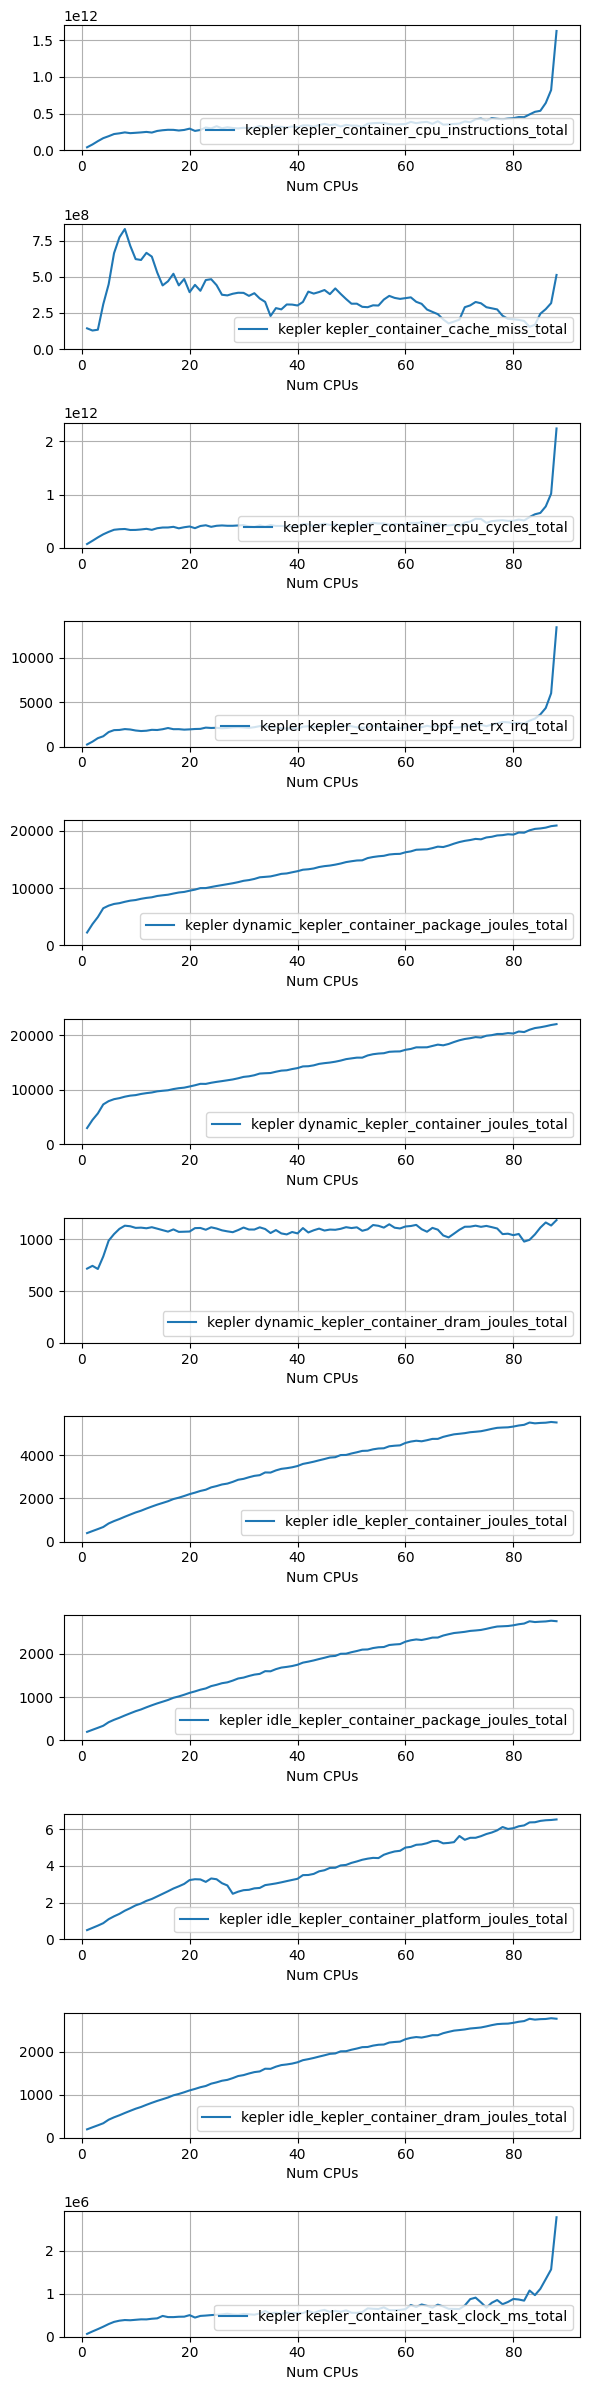

In [31]:
metrics = [
    'kepler_container_cpu_instructions_total',
    'kepler_container_cache_miss_total',
    'kepler_container_cpu_cycles_total',
    'kepler_container_bpf_net_rx_irq_total',
    'dynamic_kepler_container_package_joules_total',
    'dynamic_kepler_container_joules_total',
    'dynamic_kepler_container_dram_joules_total',
    'idle_kepler_container_joules_total',
    'idle_kepler_container_package_joules_total',
    'idle_kepler_container_platform_joules_total',
    'idle_kepler_container_dram_joules_total',
    'kepler_container_task_clock_ms_total'
]

fig, axs = plt.subplots(len(metrics), 1, figsize=(6, 24))
for i, ax in enumerate(axs.flat):
    m = df.groupby('parallel')[metrics[i]].mean()
    ax.errorbar(m.index, m, label=f"kepler {metrics[i]}")
    ax.set_xlabel('Num CPUs')
    ax.set_ylim(bottom=0)
    ax.grid(True)
    ax.legend(loc='lower right')
plt.tight_layout()
plt.show()
